In [33]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("SUB_WEEKLY_FINAL_1.csv")
df.head()

,ID,GROUP,ENROLMENTDATE,INITIALCAREPLAN,TIME_SESSION1,TIME/SESSION1_APEXPOSTSX,TIME/SESSION1_BASEPOSTERIORSX,TIME/SESSION1_BASEPOSTSX,TIME/SESSION1_C0BILAT,TIME/SESSION1_C0PS,...,WEEK16_AVERAGE,WEEK17_AVERAGE,WEEK18_AVERAGE,WEEK19_AVERAGE,WEEK20_AVERAGE,FIRST,MID,LAST,SLOPE1,SLOPE2
0,1,Active,20-Apr,3x4,20-04-2022,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,23.00,17.67,12.67,-0.6043,-1.8849
1,2,Active,20-Apr,3x4,20-04-2022,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,21.00,10.67,16.00,-1.6900,0.3214
2,3,Passive,23-Apr,2x6,23-04-2022,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,19.50,27.00,22.00,1.4054,-0.8000
3,4,Active,19-Apr,3x4,19-04-2022,3,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,18.67,16.00,12.00,-0.7641,-4.0000
4,5,Active,21-Apr,3x4,21-04-2022,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,20.50,19.00,11.00,-0.4909,-0.4527


<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_34220\2847399302.py:19: SyntaxWarning: invalid escape sequence '\d'
  df_melted['Week'] = df_melted['Week'].str.extract('(\d+)').astype(int)


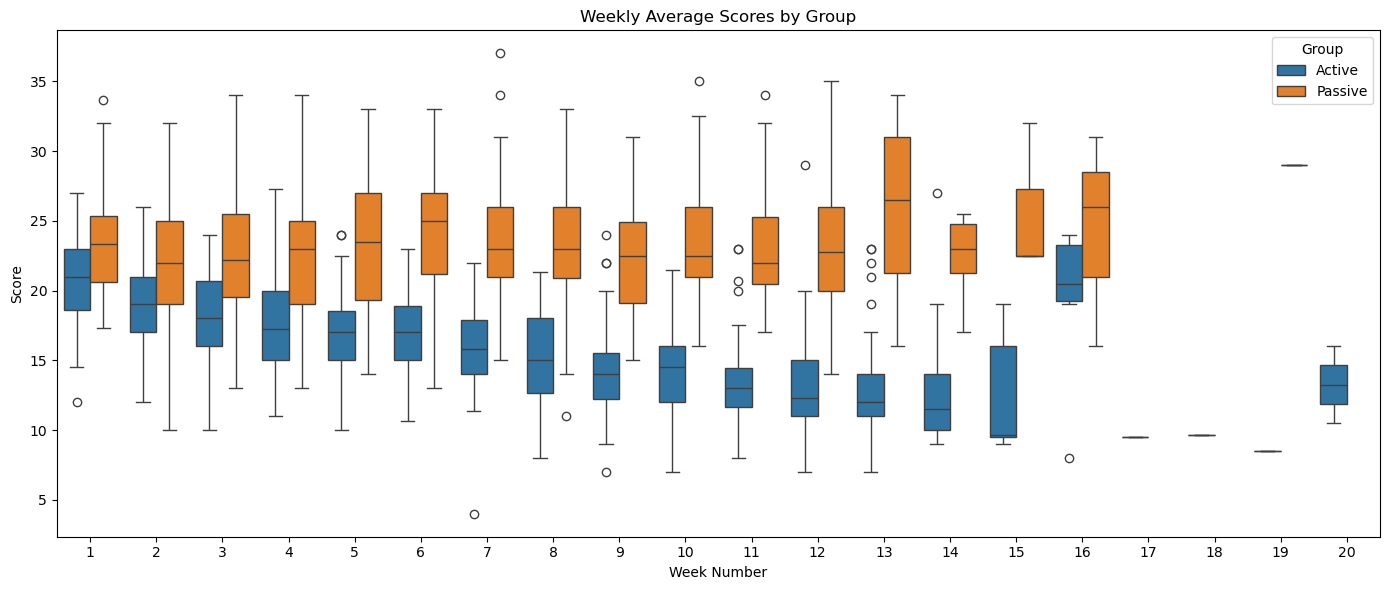

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named df

# Step 1: Select relevant columns
week_cols = [f'WEEK{i}_AVERAGE' for i in range(1, 21)]

# Step 2: Melt the dataframe to long format
df_melted = df.melt(
    id_vars='GROUP',  # This must match your group column name exactly
    value_vars=week_cols,
    var_name='Week',
    value_name='Score'
)

# Step 3: Optional — Clean 'Week' column to be just numeric
df_melted['Week'] = df_melted['Week'].str.extract('(\d+)').astype(int)

# Step 4: Filter for only 'Active' and 'Passive' groups if needed
df_melted = df_melted[df_melted['GROUP'].isin(['Active', 'Passive'])]

# Step 5: Plot using seaborn
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_melted, x='Week', y='Score', hue='GROUP')
plt.title('Weekly Average Scores by Group')
plt.xlabel('Week Number')
plt.ylabel('Score')
plt.legend(title='Group')
plt.tight_layout()
plt.show()


In [35]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("LONGITUDINAL.csv")
df.head()

,ID,GROUP,AGE,Week,Score,PSR_Compliant_EC,PSR_Compliant_EO,PSR_Firm_EC,PSR_Firm_EO,Gaitsymmetry_Walk_HF,Gaitsymmetry_Walk_HT,Steplength_Walk_HF,Steplength_Walk_HT,Steptime_Walk_HF,Steptime_Walk_HT,Stepvelocity_Walk_HF,Stepvelocity_Walk_HT
0,1,Active,A,0,23.00,2.449264,2.870729,3.022863,2.994831,58.741242,60.758268,0.538958,0.553679,0.67,0.68,0.801715,0.816422
1,1,Active,A,6,17.67,2.608000,3.007683,3.058034,3.004069,62.676928,52.087552,0.505224,0.519363,0.66,0.70,0.740778,0.780507
2,1,Active,A,12,12.67,2.835134,2.959680,3.676394,3.814218,61.337303,61.568876,0.609362,0.616855,0.64,0.63,0.930661,0.982006
3,2,Active,A,0,21.00,2.293872,2.625070,3.350297,3.404530,65.413925,66.124260,0.585015,0.548978,0.67,0.64,0.868019,0.853078
4,2,Active,A,6,10.67,2.379210,2.927952,3.100223,3.264655,64.427727,66.920432,0.566429,0.531554,0.75,0.68,0.739722,0.796473


In [36]:
# Remove all rows with any NaN values
df_cleaned = df.dropna()

# Check the new shape
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)
df = df_cleaned.copy()

Original shape: (499, 17)
Cleaned shape: (498, 17)


In [37]:
# Make sure AGE column exists and is correctly formatted
print(df['AGE'].unique())  # Optional: to inspect the values

# Split into adult and children datasets
df_adult = df[df['AGE'] == 'A'].copy()
df_child = df[df['AGE'] == 'C'].copy()

# Check sizes
print("Adults:", df_adult.shape)
print("Children:", df_child.shape)


['A' 'C']
Adults: (289, 17)
Children: (209, 17)


In [38]:

# Further split by GROUP
df_adult_active = df_adult[df_adult['GROUP'] == 'Active'].copy()
df_adult_passive = df_adult[df_adult['GROUP'] == 'Passive'].copy()
df_child_active = df_child[df_child['GROUP'] == 'Active'].copy()
df_child_passive = df_child[df_child['GROUP'] == 'Passive'].copy()

# Check sizes
print("👨‍🦱 Adult Active:", df_adult_active.shape)
print("👨‍🦱 Adult Passive:", df_adult_passive.shape)
print("🧒 Child Active:", df_child_active.shape)
print("🧒 Child Passive:", df_child_passive.shape)

👨‍🦱 Adult Active: (145, 17)
👨‍🦱 Adult Passive: (144, 17)
🧒 Child Active: (111, 17)
🧒 Child Passive: (98, 17)


In [39]:
# List of groups and labels
groups = [
    (df_adult_active, 'Adult Active'),
    (df_adult_passive, 'Adult Passive'),
    (df_child_active, 'Child Active'),
    (df_child_passive, 'Child Passive')
]

vars_to_summarize = [
    'Gaitsymmetry_Walk_HT',
    'Gaitsymmetry_Walk_HF',
    'Steplength_Walk_HT',
    'Steplength_Walk_HF',
    'Steptime_Walk_HT',
    'Steptime_Walk_HF',
    'Stepvelocity_Walk_HT',
    'Stepvelocity_Walk_HF'
]

# Function to summarize
def summarize(df_subset, label):
    summary = df_subset[vars_to_summarize].describe().loc[['mean', 'std', 'min', 'max']].T
    summary['Variable'] = summary.index
    summary['Group'] = label
    return summary[['Group', 'Variable', 'mean', 'std', 'min', 'max']]

# Loop through each group and print
for df_subset, label in groups:
    print(f"\n===== Summary for {label} =====")
    display(summarize(df_subset, label))  



===== Summary for Adult Active =====


,Group,Variable,mean,std,min,max
Gaitsymmetry_Walk_HT,Adult Active,Gaitsymmetry_Walk_HT,61.584310,6.413204,39.415410,73.883265
Gaitsymmetry_Walk_HF,Adult Active,Gaitsymmetry_Walk_HF,63.976307,4.894481,36.876936,73.087545
Steplength_Walk_HT,Adult Active,Steplength_Walk_HT,0.585125,0.073321,0.381623,0.764110
Steplength_Walk_HF,Adult Active,Steplength_Walk_HF,0.593491,0.062292,0.395397,0.750135
Steptime_Walk_HT,Adult Active,Steptime_Walk_HT,0.632759,0.075854,0.500000,0.900000
Steptime_Walk_HF,Adult Active,Steptime_Walk_HF,0.616069,0.072964,0.500000,0.910000
Stepvelocity_Walk_HT,Adult Active,Stepvelocity_Walk_HT,0.943587,0.194738,0.557621,1.468759
Stepvelocity_Walk_HF,Adult Active,Stepvelocity_Walk_HF,0.981401,0.172192,0.581117,1.393625



===== Summary for Adult Passive =====


,Group,Variable,mean,std,min,max
Gaitsymmetry_Walk_HT,Adult Passive,Gaitsymmetry_Walk_HT,61.376065,6.155332,31.747672,71.402452
Gaitsymmetry_Walk_HF,Adult Passive,Gaitsymmetry_Walk_HF,63.736923,3.634639,53.061029,70.888926
Steplength_Walk_HT,Adult Passive,Steplength_Walk_HT,0.572816,0.066005,0.282213,0.707369
Steplength_Walk_HF,Adult Passive,Steplength_Walk_HF,0.581008,0.059347,0.407747,0.713721
Steptime_Walk_HT,Adult Passive,Steptime_Walk_HT,0.629722,0.068945,0.510000,0.920000
Steptime_Walk_HF,Adult Passive,Steptime_Walk_HF,0.611337,0.066690,0.480000,0.845000
Stepvelocity_Walk_HT,Adult Passive,Stepvelocity_Walk_HT,0.923174,0.164355,0.457670,1.341405
Stepvelocity_Walk_HF,Adult Passive,Stepvelocity_Walk_HF,0.964944,0.160608,0.511329,1.407514



===== Summary for Child Active =====


,Group,Variable,mean,std,min,max
Gaitsymmetry_Walk_HT,Child Active,Gaitsymmetry_Walk_HT,56.114608,8.648875,31.148080,69.792869
Gaitsymmetry_Walk_HF,Child Active,Gaitsymmetry_Walk_HF,59.033395,6.945211,35.029220,70.950475
Steplength_Walk_HT,Child Active,Steplength_Walk_HT,0.508892,0.081144,0.353616,0.757234
Steplength_Walk_HF,Child Active,Steplength_Walk_HF,0.522872,0.076317,0.367768,0.757729
Steptime_Walk_HT,Child Active,Steptime_Walk_HT,0.603739,0.078107,0.460000,0.945000
Steptime_Walk_HF,Child Active,Steptime_Walk_HF,0.582477,0.074827,0.430000,0.780000
Stepvelocity_Walk_HT,Child Active,Stepvelocity_Walk_HT,0.858840,0.189295,0.464789,1.416200
Stepvelocity_Walk_HF,Child Active,Stepvelocity_Walk_HF,0.914587,0.182560,0.555830,1.382284



===== Summary for Child Passive =====


,Group,Variable,mean,std,min,max
Gaitsymmetry_Walk_HT,Child Passive,Gaitsymmetry_Walk_HT,56.634061,7.554484,30.206380,71.521658
Gaitsymmetry_Walk_HF,Child Passive,Gaitsymmetry_Walk_HF,60.062088,5.069409,46.435318,71.610856
Steplength_Walk_HT,Child Passive,Steplength_Walk_HT,0.525181,0.074959,0.381423,0.787046
Steplength_Walk_HF,Child Passive,Steplength_Walk_HF,0.530899,0.069086,0.406000,0.744076
Steptime_Walk_HT,Child Passive,Steptime_Walk_HT,0.595000,0.069163,0.470000,0.790000
Steptime_Walk_HF,Child Passive,Steptime_Walk_HF,0.571939,0.068019,0.460000,0.800000
Stepvelocity_Walk_HT,Child Passive,Stepvelocity_Walk_HT,0.898173,0.185725,0.529510,1.570955
Stepvelocity_Walk_HF,Child Passive,Stepvelocity_Walk_HF,0.942370,0.170548,0.519892,1.419822


In [56]:
import statsmodels.formula.api as smf

model = smf.mixedlm(
    "Steplength_Walk_HT ~ C(Week) * GROUP + Score + AGE*GROUP",
    data=df,
    groups=df["ID"]
)
result = model.fit()
print(result.summary())

                  Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    Steplength_Walk_HT
No. Observations:    498        Method:                REML              
No. Groups:          170        Scale:                 0.0013            
Min. group size:     2          Log-Likelihood:        715.3227          
Max. group size:     3          Converged:             Yes               
Mean group size:     2.9                                                 
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                       0.592    0.016 37.818 0.000  0.561  0.622
C(Week)[T.6]                   -0.007    0.006 -1.117 0.264 -0.018  0.005
C(Week)[T.12]                   0.006    0.007  0.867 0.386 -0.008  0.020
GROUP[T.Passive]               -0.008    0.014 -0.560 0.

C:\Users\ASUS\New folder\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices("Steplength_Walk_HT ~ C(Week) * GROUP + Score + AGE*GROUP",
    data=df,
    return_type='dataframe'
)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["variable"] = X.columns
print(vif)

         VIF                        variable
0  37.781334                       Intercept
1   2.843123                    C(Week)[T.6]
2   3.376752                   C(Week)[T.12]
3   3.736054                GROUP[T.Passive]
4   1.941796                        AGE[T.C]
5   3.487357   C(Week)[T.6]:GROUP[T.Passive]
6   3.705343  C(Week)[T.12]:GROUP[T.Passive]
7   2.611978       AGE[T.C]:GROUP[T.Passive]
8   2.130628                           Score


In [58]:
import statsmodels.formula.api as smf

model = smf.mixedlm(
    "Stepvelocity_Walk_HT ~ C(Week) * GROUP + Score + AGE*GROUP",
    data=df,
    groups=df["ID"]
)
result = model.fit()
print(result.summary())

                  Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   Stepvelocity_Walk_HT
No. Observations:    498       Method:               REML                
No. Groups:          170       Scale:                0.0102              
Min. group size:     2         Log-Likelihood:       235.1505            
Max. group size:     3         Converged:            Yes                 
Mean group size:     2.9                                                 
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                       0.952    0.041 23.004 0.000  0.871  1.033
C(Week)[T.6]                   -0.004    0.017 -0.227 0.820 -0.037  0.029
C(Week)[T.12]                   0.025    0.020  1.275 0.202 -0.013  0.063
GROUP[T.Passive]               -0.015    0.036 -0.407 0.

In [59]:
import statsmodels.formula.api as smf

model = smf.mixedlm(
    "Stepvelocity_Walk_HF ~ C(Week) * GROUP + Score + AGE*GROUP",
    data=df,
    groups=df["ID"]
)
result = model.fit()
print(result.summary())

                  Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   Stepvelocity_Walk_HF
No. Observations:    498       Method:               REML                
No. Groups:          170       Scale:                0.0102              
Min. group size:     2         Log-Likelihood:       249.6645            
Max. group size:     3         Converged:            Yes                 
Mean group size:     2.9                                                 
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                       1.007    0.040 25.154 0.000  0.928  1.085
C(Week)[T.6]                   -0.011    0.017 -0.670 0.503 -0.044  0.022
C(Week)[T.12]                   0.001    0.019  0.068 0.946 -0.037  0.039
GROUP[T.Passive]               -0.005    0.033 -0.148 0.

In [60]:
import statsmodels.formula.api as smf

model = smf.mixedlm(
    "Steptime_Walk_HT ~ C(Week) * GROUP + Score + AGE*GROUP",
    data=df,
    groups=df["ID"]
)
result = model.fit()
print(result.summary())

                  Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    Steptime_Walk_HT
No. Observations:      498        Method:                REML            
No. Groups:            170        Scale:                 0.0017          
Min. group size:       2          Log-Likelihood:        679.6637        
Max. group size:       3          Converged:             Yes             
Mean group size:       2.9                                               
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                       0.626    0.017 37.624 0.000  0.594  0.659
C(Week)[T.6]                   -0.007    0.007 -0.956 0.339 -0.020  0.007
C(Week)[T.12]                  -0.010    0.008 -1.301 0.193 -0.026  0.005
GROUP[T.Passive]               -0.006    0.014 -0.415 0.

C:\Users\ASUS\New folder\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [61]:
import statsmodels.formula.api as smf

model = smf.mixedlm(
    "Steptime_Walk_HF ~ C(Week) * GROUP + Score + AGE*GROUP",
    data=df,
    groups=df["ID"]
)
result = model.fit()
print(result.summary())

                  Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    Steptime_Walk_HF
No. Observations:      498        Method:                REML            
No. Groups:            170        Scale:                 0.0015          
Min. group size:       2          Log-Likelihood:        698.6471        
Max. group size:       3          Converged:             Yes             
Mean group size:       2.9                                               
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                       0.602    0.016 37.589 0.000  0.571  0.634
C(Week)[T.6]                   -0.002    0.007 -0.356 0.722 -0.015  0.010
C(Week)[T.12]                  -0.002    0.008 -0.221 0.825 -0.017  0.013
GROUP[T.Passive]               -0.014    0.014 -1.011 0.

C:\Users\ASUS\New folder\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [43]:
import statsmodels.formula.api as smf

model = smf.mixedlm(
    "Gaitsymmetry_Walk_HT ~ C(Week) * GROUP + Score + AGE*GROUP",
    data=df,
    groups=df["ID"]
)
result = model.fit()
print(result.summary())

                  Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   Gaitsymmetry_Walk_HT
No. Observations:    498       Method:               REML                
No. Groups:          170       Scale:                22.0678             
Min. group size:     2         Log-Likelihood:       -1602.4727          
Max. group size:     3         Converged:            Yes                 
Mean group size:     2.9                                                 
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                      59.509    1.762 33.779 0.000 56.056 62.962
C(Week)[T.6]                    0.302    0.775  0.390 0.696 -1.216  1.821
C(Week)[T.12]                   3.062    0.896  3.418 0.001  1.306  4.818
GROUP[T.Passive]               -0.525    1.357 -0.387 0.

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices("Gaitsymmetry_Walk_HT ~ C(Week) * GROUP + Score + AGE*GROUP", data=df, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["variable"] = X.columns
print(vif)

         VIF                        variable
0  37.781334                       Intercept
1   2.843123                    C(Week)[T.6]
2   3.376752                   C(Week)[T.12]
3   3.736054                GROUP[T.Passive]
4   1.941796                        AGE[T.C]
5   3.487357   C(Week)[T.6]:GROUP[T.Passive]
6   3.705343  C(Week)[T.12]:GROUP[T.Passive]
7   2.611978       AGE[T.C]:GROUP[T.Passive]
8   2.130628                           Score


In [45]:
import statsmodels.formula.api as smf

model_mean_diff_mixed = smf.mixedlm(
    "Gaitsymmetry_Walk_HT ~ GROUP",  # Only group as fixed effect
    data=df,
    groups=df["ID"]  # Random intercept for each subject
).fit()
print(model_mean_diff_mixed.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Gaitsymmetry_Walk_HT
No. Observations: 498     Method:             REML                
No. Groups:       170     Scale:              23.4018             
Min. group size:  2       Log-Likelihood:     -1630.8833          
Max. group size:  3       Converged:          Yes                 
Mean group size:  2.9                                             
-------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-------------------------------------------------------------------
Intercept           59.232     0.694  85.333  0.000  57.872  60.593
GROUP[T.Passive]     0.199     0.999   0.200  0.842  -1.758   2.156
Group Var           34.273     1.179                               



In [62]:
import statsmodels.formula.api as smf

model = smf.mixedlm(
    "Gaitsymmetry_Walk_HF ~ C(Week) * GROUP + Score+ AGE*GROUP",
    data=df,
    groups=df["ID"]
)
result = model.fit()
print(result.summary())

                  Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   Gaitsymmetry_Walk_HF
No. Observations:    498       Method:               REML                
No. Groups:          170       Scale:                14.3197             
Min. group size:     2         Log-Likelihood:       -1470.1430          
Max. group size:     3         Converged:            Yes                 
Mean group size:     2.9                                                 
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                      63.521    1.342 47.322 0.000 60.890 66.152
C(Week)[T.6]                    0.634    0.621  1.020 0.308 -0.584  1.851
C(Week)[T.12]                   1.845    0.714  2.585 0.010  0.446  3.244
GROUP[T.Passive]                0.459    0.965  0.476 0.

In [63]:
import statsmodels.formula.api as smf

model = smf.mixedlm(
    "PSR_Compliant_EC ~ C(Week) * GROUP + Score + AGE*GROUP",
    data=df,
    groups=df["ID"]
)
result = model.fit()
print(result.summary())

                  Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    PSR_Compliant_EC
No. Observations:      498        Method:                REML            
No. Groups:            170        Scale:                 0.0556          
Min. group size:       2          Log-Likelihood:        -124.6916       
Max. group size:       3          Converged:             Yes             
Mean group size:       2.9                                               
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                       2.431    0.086 28.358 0.000  2.263  2.599
C(Week)[T.6]                    0.027    0.039  0.683 0.494 -0.050  0.103
C(Week)[T.12]                   0.134    0.045  3.007 0.003  0.047  0.222
GROUP[T.Passive]                0.086    0.063  1.360 0.

In [64]:
import statsmodels.formula.api as smf

model = smf.mixedlm(
    "PSR_Compliant_EO ~ C(Week) * GROUP + Score + AGE*GROUP",
    data=df,
    groups=df["ID"]
)
result = model.fit()
print(result.summary())

                  Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    PSR_Compliant_EO
No. Observations:      498        Method:                REML            
No. Groups:            170        Scale:                 0.0406          
Min. group size:       2          Log-Likelihood:        -44.0878        
Max. group size:       3          Converged:             Yes             
Mean group size:       2.9                                               
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                       2.871    0.073 39.496 0.000  2.729  3.014
C(Week)[T.6]                   -0.006    0.033 -0.196 0.845 -0.071  0.058
C(Week)[T.12]                   0.147    0.038  3.848 0.000  0.072  0.221
GROUP[T.Passive]                0.025    0.053  0.471 0.

In [65]:
import statsmodels.formula.api as smf

model = smf.mixedlm(
    "PSR_Firm_EC ~ C(Week) * GROUP + Score + AGE*GROUP",
    data=df,
    groups=df["ID"]
)
result = model.fit()
print(result.summary())

                  Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      PSR_Firm_EC
No. Observations:       498          Method:                  REML       
No. Groups:             170          Scale:                   0.0442     
Min. group size:        2            Log-Likelihood:          -83.2506   
Max. group size:        3            Converged:               Yes        
Mean group size:        2.9                                              
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                       3.283    0.079 41.630 0.000  3.129  3.438
C(Week)[T.6]                   -0.170    0.035 -4.898 0.000 -0.238 -0.102
C(Week)[T.12]                  -0.029    0.040 -0.725 0.468 -0.108  0.050
GROUP[T.Passive]               -0.070    0.061 -1.150 0.

In [66]:
import statsmodels.formula.api as smf

model = smf.mixedlm(
    "PSR_Firm_EO ~ C(Week) * GROUP + Score + AGE*GROUP",
    data=df,
    groups=df["ID"]
)
result = model.fit()
print(result.summary())

                  Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      PSR_Firm_EO
No. Observations:       498          Method:                  REML       
No. Groups:             170          Scale:                   0.0511     
Min. group size:        2            Log-Likelihood:          -101.1798  
Max. group size:        3            Converged:               Yes        
Mean group size:        2.9                                              
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                       3.164    0.082 38.729 0.000  3.003  3.324
C(Week)[T.6]                   -0.051    0.037 -1.360 0.174 -0.123  0.022
C(Week)[T.12]                   0.123    0.043  2.881 0.004  0.039  0.207
GROUP[T.Passive]               -0.051    0.060 -0.855 0.